In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
import joblib

import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
import math

In [2]:
all_data = pd.read_csv("RV2_UPP_IIR_SIPIA.csv")
print(all_data.head())

                        Date  Latitude  Longitude  Altitude   NO2  PM2.5  O3  \
0  2023-02-22 09:15:00+00:00   46.5592  15.656191     270.0  35.0   23.0   0   
1  2023-02-22 09:35:00+00:00   46.5592  15.656191     270.0  35.0   23.0   0   
2  2023-02-16 17:15:00+00:00   46.5592  15.656191     270.0  86.0   51.0   0   
3  2023-02-16 17:35:00+00:00   46.5592  15.656191     270.0  86.0   51.0   0   
4  2023-10-24 10:35:00+00:00   46.5592  15.656191     270.0  68.0   19.0   0   

   PM10  
0  88.0  
1  88.0  
2  86.0  
3  86.0  
4  74.0  


In [3]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data.sort_values(by='Date', inplace=True)
features = ['Latitude', 'Longitude', 'Altitude', 'NO2', 'PM2.5', 'O3', 'PM10']
all_data = all_data[['Date'] + features]

In [4]:
missing_values = all_data.isnull().sum()

print(missing_values)

Date           0
Latitude       0
Longitude      0
Altitude       0
NO2          286
PM2.5        465
O3             0
PM10         466
dtype: int64


In [5]:
# Assuming 'all_data' is your DataFrame
measurements_by_day = all_data.groupby(all_data['Date'].dt.date).size()

# Print the result
print(measurements_by_day)


Date
2023-02-15     9
2023-02-16    48
2023-02-17    48
2023-02-18    48
2023-02-19    48
              ..
2023-12-07    24
2023-12-08    24
2023-12-09    24
2023-12-10    24
2023-12-11     9
Length: 211, dtype: int64


In [6]:
all_data = all_data.copy()
columns_with_missing_values = all_data.columns[all_data.isnull().any()]
print(columns_with_missing_values)
columns_with_missing_values = columns_with_missing_values.tolist()
missing_df = all_data[all_data.isnull().any(axis=1)]
complete_df = all_data.dropna()


Index(['NO2', 'PM2.5', 'PM10'], dtype='object')


In [7]:
def plot_histograms(df):
    numeric_columns = df.select_dtypes(include=['number'])
    numeric_columns.hist(bins=20, figsize=(20, 20))
    plt.title("Histograms of numerical columns")
    plt.show()

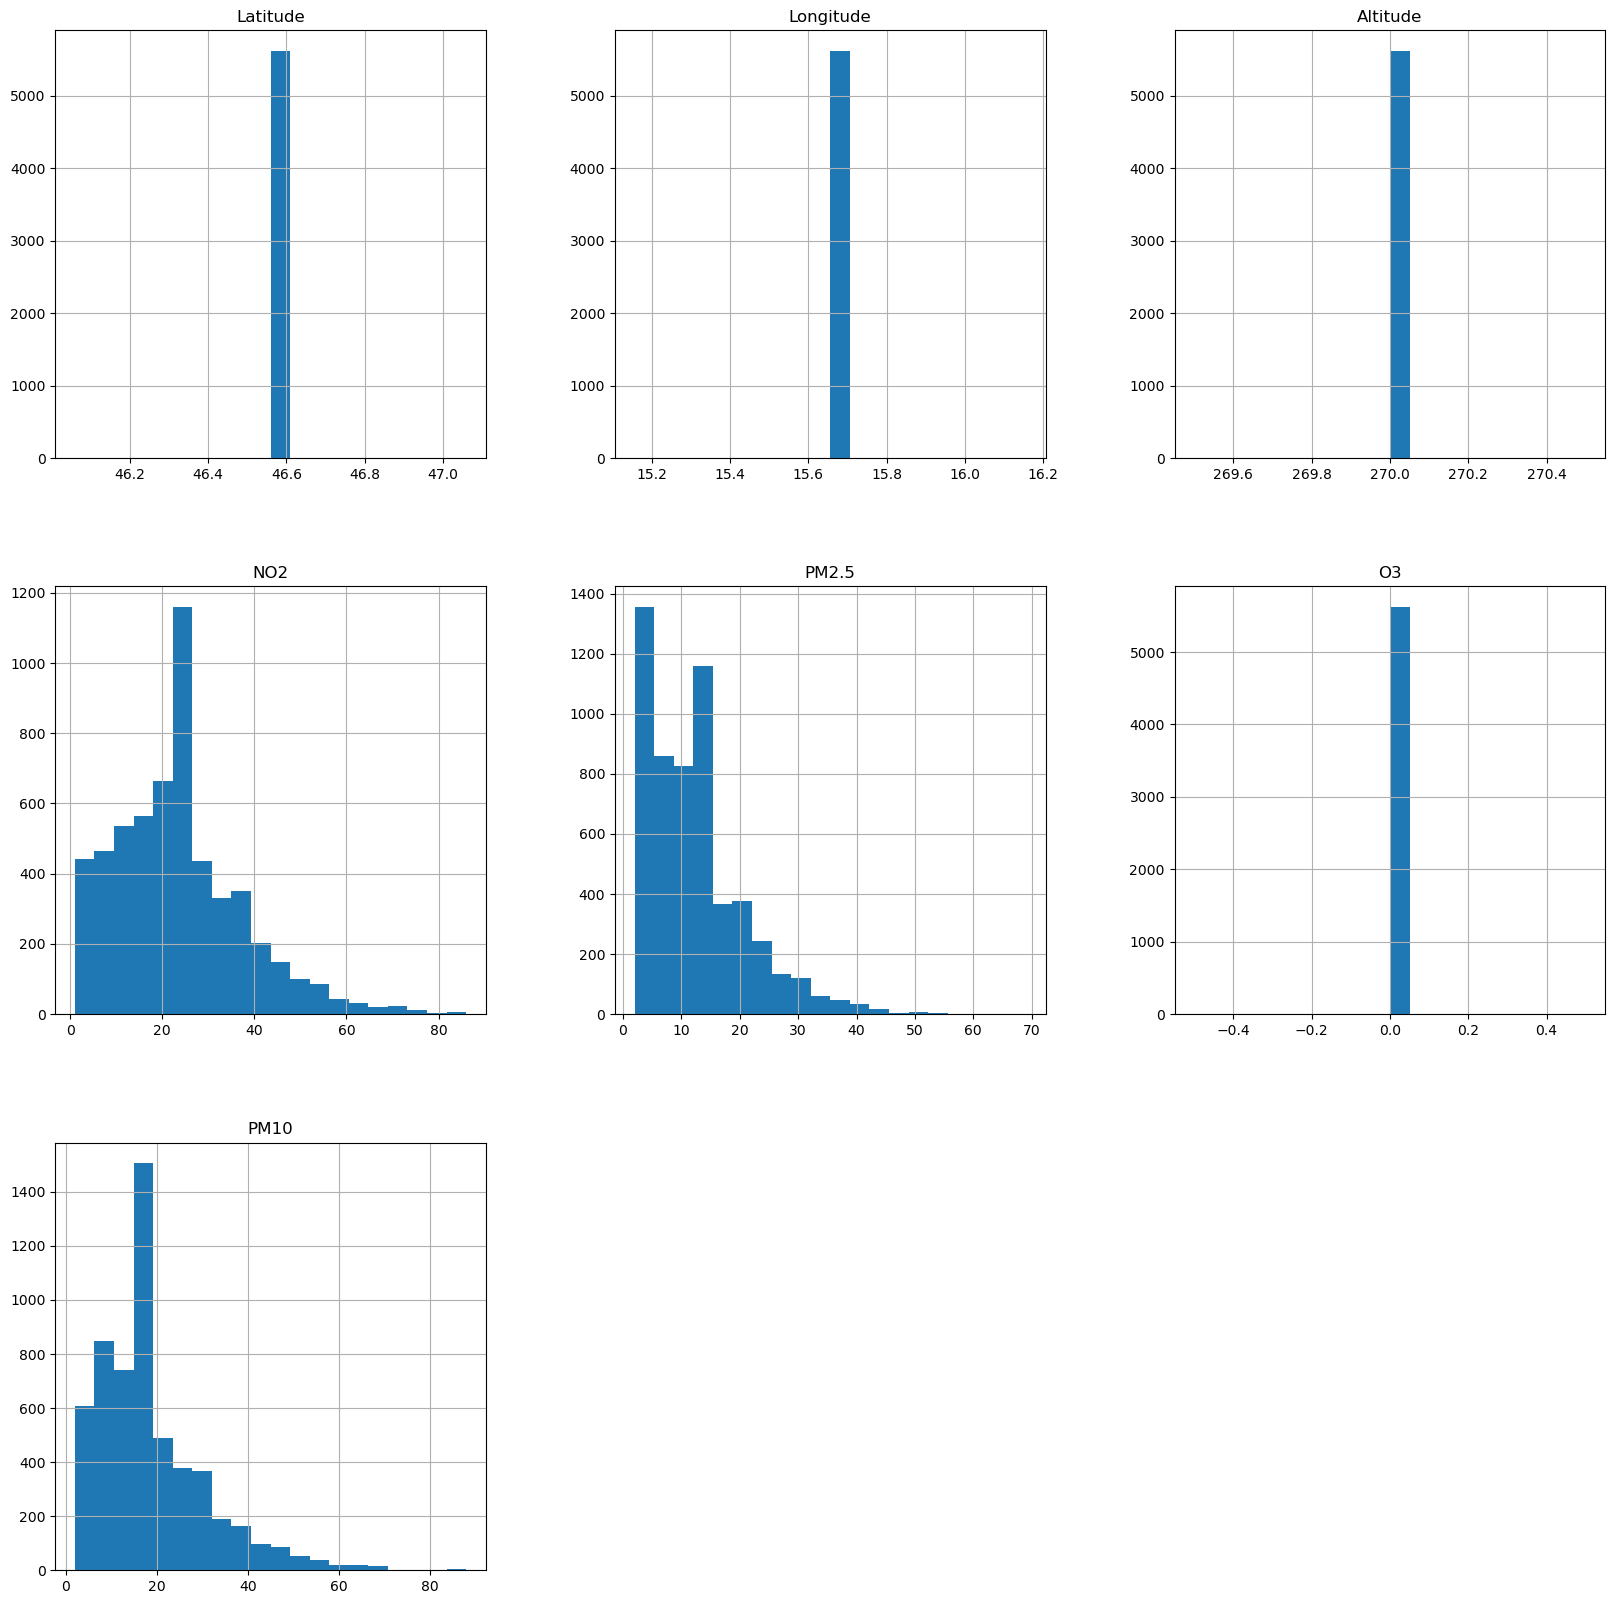

In [25]:
plot_histograms(all_data)

In [8]:
for column in columns_with_missing_values:
    X = complete_df[['Latitude', 'Longitude', 'Altitude', 'O3']]
    y = complete_df[column]
    
    model = RandomForestRegressor()
    model.fit(X, y)
    
    missing_X = missing_df[['Latitude', 'Longitude', 'Altitude', 'O3']]
    predictions = model.predict(missing_X)
    
    all_data.loc[missing_df.index, column] = predictions

missing_values = all_data.isnull().sum()

print(missing_values)

multivariate_series = np.array(all_data[features].values)

Date         0
Latitude     0
Longitude    0
Altitude     0
NO2          0
PM2.5        0
O3           0
PM10         0
dtype: int64


In [9]:
def plot_numeric_data(data):
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)

    plt.tight_layout()
    plt.show()

In [10]:
print(all_data["Latitude"].describe())
print(all_data["Latitude"].value_counts())
print(all_data["Longitude"].value_counts())
print(all_data["O3"].value_counts())
print(all_data["O3"])

count    5.625000e+03
mean     4.655920e+01
std      4.384438e-12
min      4.655920e+01
25%      4.655920e+01
50%      4.655920e+01
75%      4.655920e+01
max      4.655920e+01
Name: Latitude, dtype: float64
Latitude
46.5592    5625
Name: count, dtype: int64
Longitude
15.656191    5625
Name: count, dtype: int64
O3
0    5625
Name: count, dtype: int64
72      0
78      0
79      0
153     0
154     0
       ..
1880    0
2633    0
3067    0
3548    0
3844    0
Name: O3, Length: 5625, dtype: int64


In [11]:
def printSkew():
  skewness_info = []
  for column in all_data.columns[1:]:
      skew = all_data[column].skew()
      skewness_info.append((column, skew))

  # Pretvori seznam v DataFrame za lažje prikazovanje
  skewness_df = pd.DataFrame(skewness_info, columns=['Column Name', 'Skewness'])

  # Izpišite oznako stolpca in njegovo poševnost
  print(skewness_df)

printSkew()

  Column Name  Skewness
0    Latitude  0.000000
1   Longitude  0.000000
2    Altitude  0.000000
3         NO2  0.922151
4       PM2.5  1.449966
5          O3  0.000000
6        PM10  1.351296


In [12]:
# Right skeewed data ["NO2", "PM2.5"]

right_skew_columns = ["NO2", "PM2.5"]
for col in right_skew_columns:
    all_data[col] = np.log(all_data[col]+1 )

  Column Name  Skewness
0    Latitude  0.000000
1   Longitude  0.000000
2    Altitude  0.000000
3         NO2 -0.762377
4       PM2.5 -0.159715
5          O3  0.000000
6        PM10  1.351296


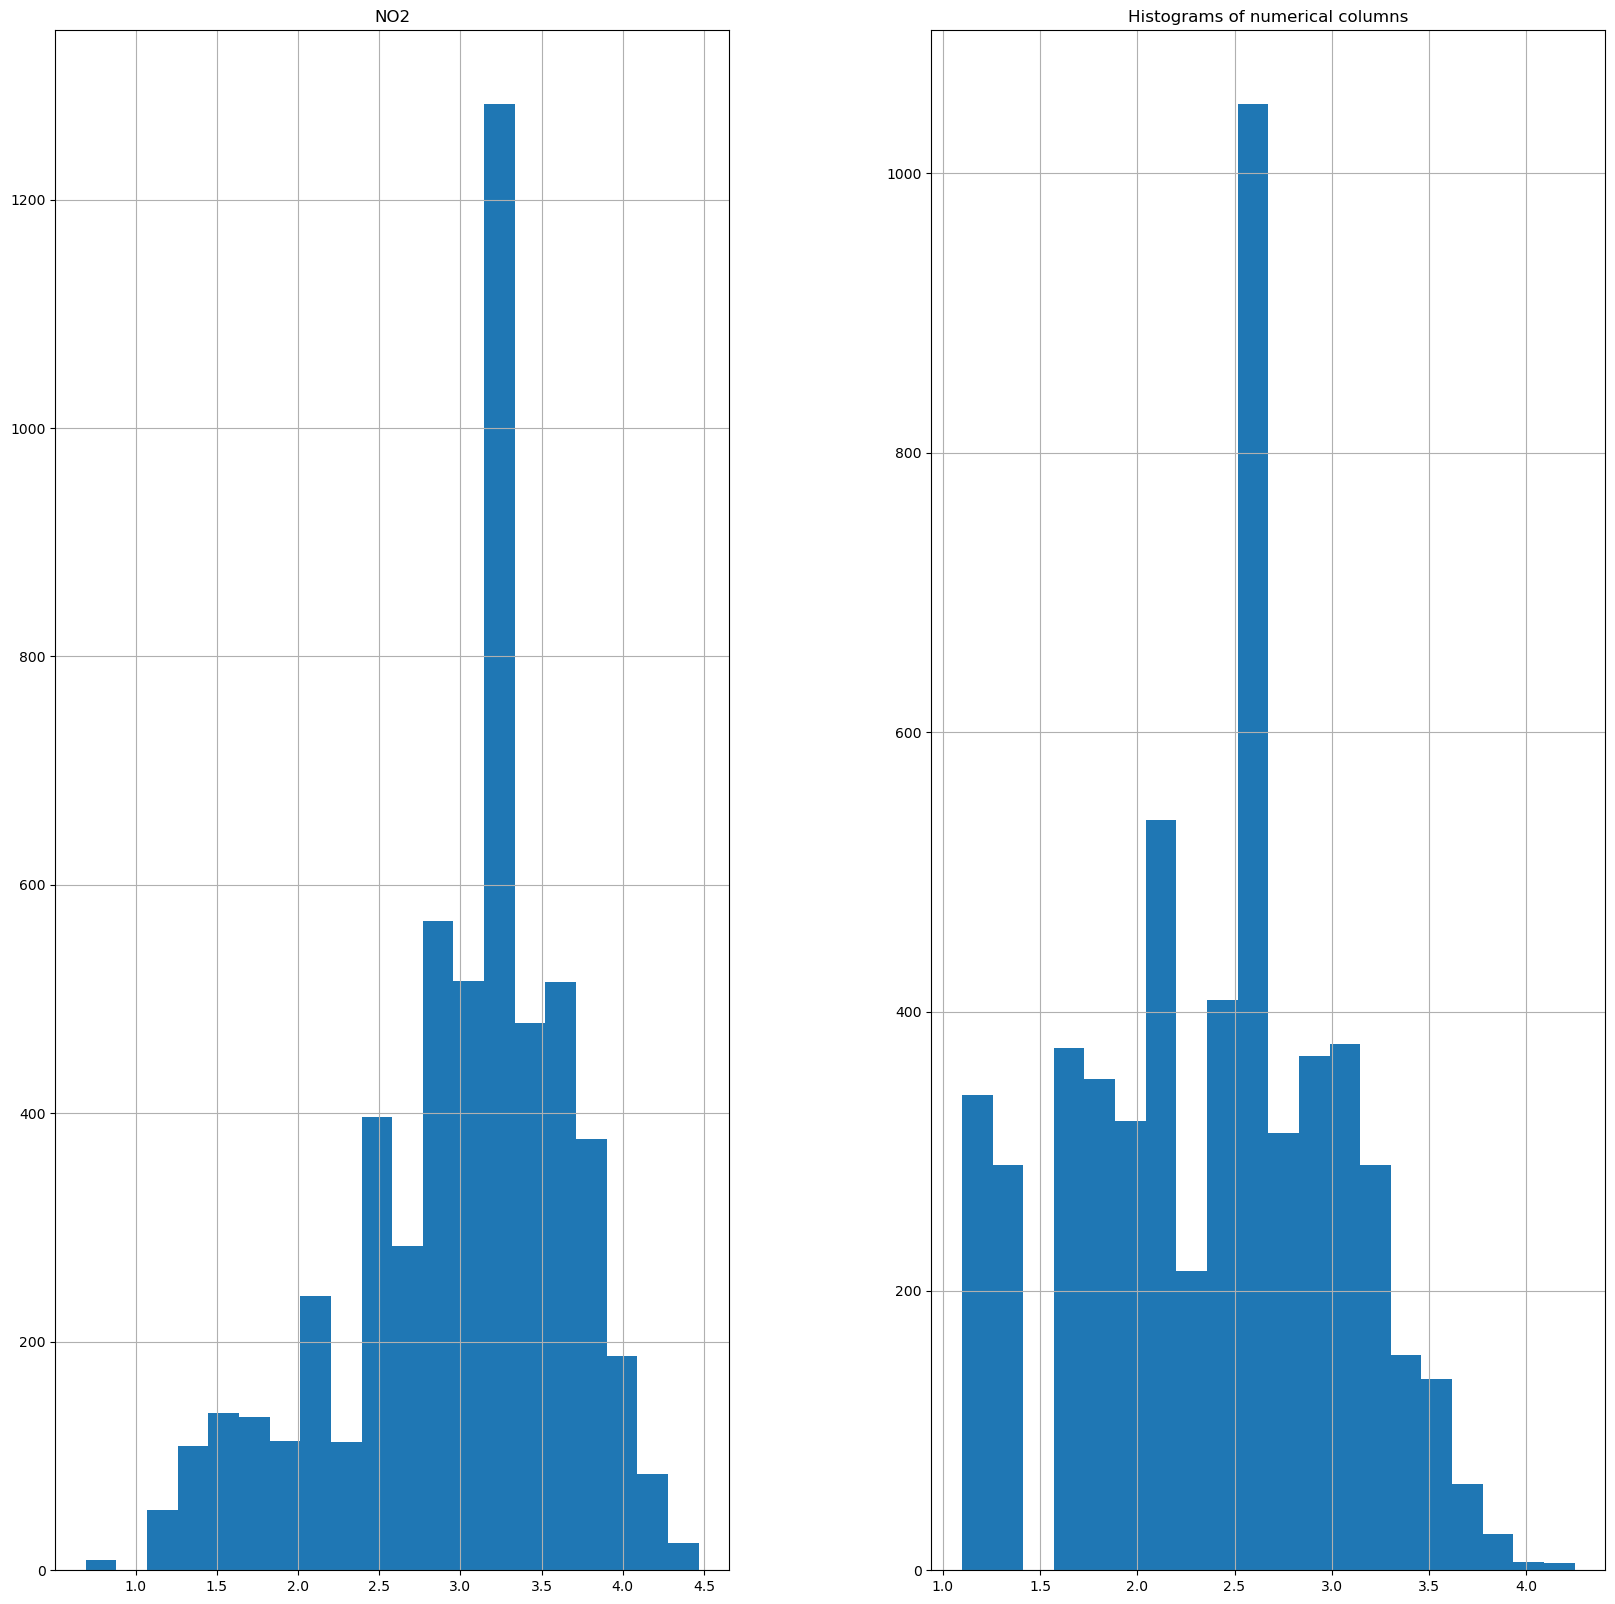

In [13]:
printSkew()
plot_histograms(all_data[['NO2', 'PM2.5']])

# Nove Značilnice

In [14]:
#engeeniring features
all_data['NO2_PM2.5_Interact'] = all_data['NO2'] * all_data['PM2.5']


In [15]:
all_data['Day'] = all_data['Date'].dt.day
all_data['Month'] = all_data['Date'].dt.month
all_data['Hour'] = all_data['Date'].dt.hour
all_data['Day_of_Week'] = all_data['Date'].dt.dayofweek



In [16]:
all_data["Day_of_Week"]

72      2
78      2
79      2
153     2
154     2
       ..
1880    0
2633    0
3067    0
3548    0
3844    0
Name: Day_of_Week, Length: 5625, dtype: int32

In [17]:
all_data['Hour_NO2_Interaction'] = all_data['Hour'] * all_data['NO2']
all_data['Hour_PM2.5_Interaction'] = all_data['Hour'] * all_data['PM2.5']

In [18]:
all_data.head()

,Date,Latitude,Longitude,Altitude,NO2,PM2.5,O3,PM10,NO2_PM2.5_Interact,Day,Month,Hour,Day_of_Week,Hour_NO2_Interaction,Hour_PM2.5_Interaction
72,2023-02-15 19:35:00+00:00,46.5592,15.656191,270.0,3.871201,3.871201,0,56.0,14.986197,15,2,19,2,73.552819,73.552819
78,2023-02-15 20:15:00+00:00,46.5592,15.656191,270.0,3.713572,3.912023,0,56.0,14.527579,15,2,20,2,74.271441,78.240460
79,2023-02-15 20:35:00+00:00,46.5592,15.656191,270.0,3.713572,3.912023,0,56.0,14.527579,15,2,20,2,74.271441,78.240460
153,2023-02-15 21:15:00+00:00,46.5592,15.656191,270.0,3.465736,3.806662,0,49.0,13.192887,15,2,21,2,72.780454,79.939912
154,2023-02-15 21:35:00+00:00,46.5592,15.656191,270.0,3.465736,3.806662,0,49.0,13.192887,15,2,21,2,72.780454,79.939912


# Information Gain

In [19]:
target = all_data['PM10']
target_feature = all_data.drop('Date', axis=1)

info_gains = mutual_info_regression(target_feature.drop('PM10', axis=1), target)

info_gain_df = pd.DataFrame({'Feature': target_feature.columns.drop('PM10'), 'Information_Gain': info_gains})
info_gain_df = info_gain_df.sort_values(by='Information_Gain', ascending=False)

print(info_gain_df)

threshold = 0.1
selected_features = info_gain_df[info_gain_df['Information_Gain'] >= threshold]['Feature']

print("Selected Features:")
print(selected_features)

                   Feature  Information_Gain
4                    PM2.5          1.395044
6       NO2_PM2.5_Interact          1.243822
12  Hour_PM2.5_Interaction          0.786125
3                      NO2          0.579416
11    Hour_NO2_Interaction          0.408962
7                      Day          0.196769
8                    Month          0.177793
9                     Hour          0.052097
10             Day_of_Week          0.051364
5                       O3          0.001643
0                 Latitude          0.000978
1                Longitude          0.000978
2                 Altitude          0.000000
Selected Features:
4                      PM2.5
6         NO2_PM2.5_Interact
12    Hour_PM2.5_Interaction
3                        NO2
11      Hour_NO2_Interaction
7                        Day
8                      Month
Name: Feature, dtype: object


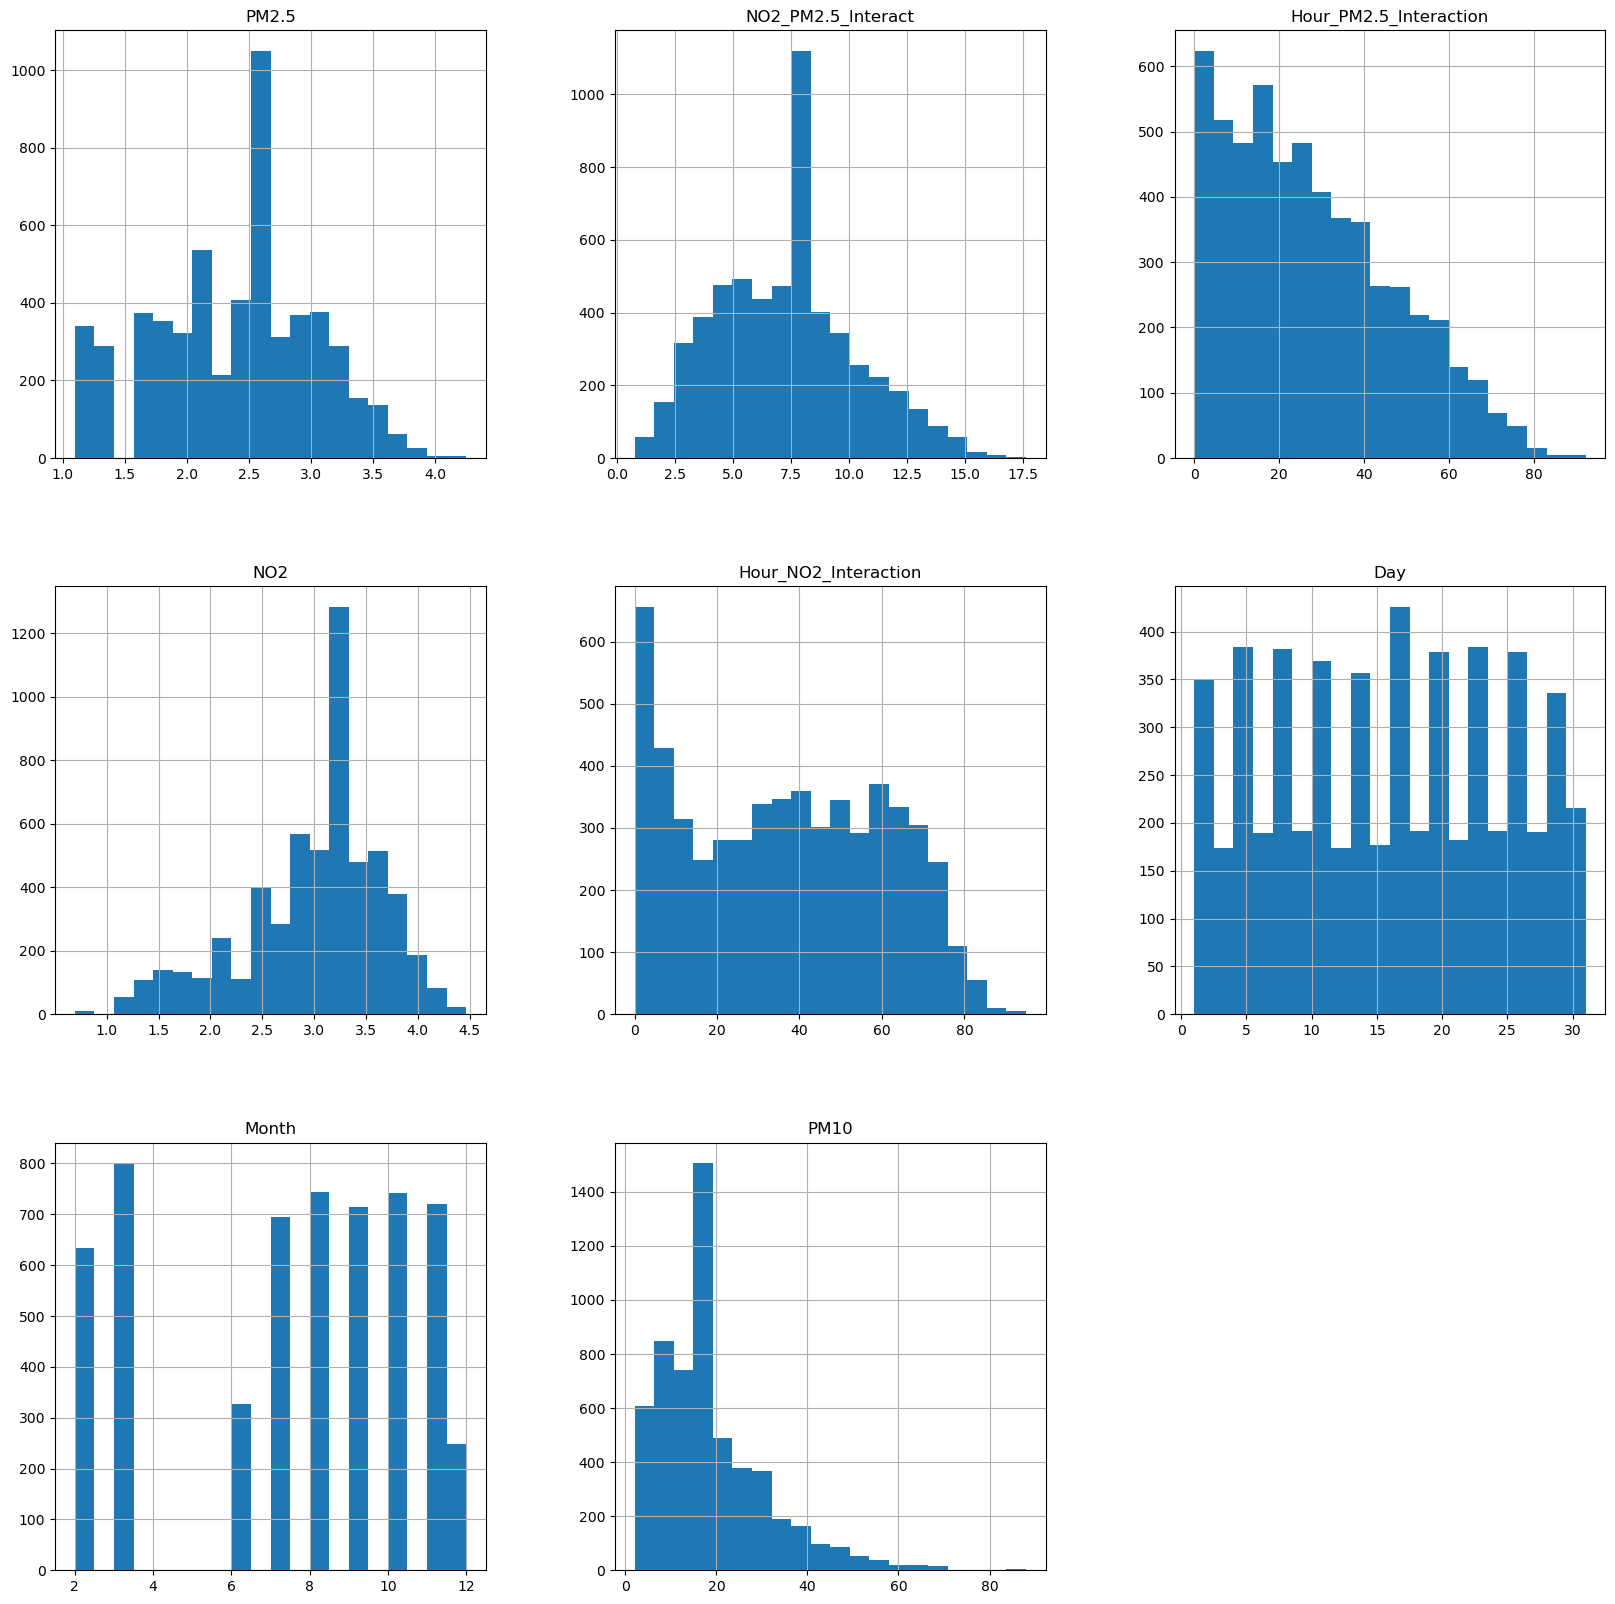

In [22]:
learn_features = all_data[['Date'] + list(selected_features) + ['PM10']]
plot_histograms(learn_features)


In [23]:
# spliting data into test and train
train_size = len(multivariate_series) - 1302 - 186
train_data, test_data = multivariate_series[:train_size], multivariate_series[train_size:]

In [24]:
train_data.shape, test_data.shape

((4137, 7), (1488, 7))

In [27]:
train_pm10 = np.array(train_data[:,6])
test_pm10 = np.array(test_data[:,6])
pm10_scaler = MinMaxScaler()
train_pm10_normalized = pm10_scaler.fit_transform(train_pm10.reshape(-1, 1))
test_pm10_normalized = pm10_scaler.transform(test_pm10.reshape(-1, 1))

print(train_pm10_normalized)
print(test_pm10_normalized)


[[0.62790698]
 [0.62790698]
 [0.62790698]
 ...
 [0.1980612 ]
 [0.1980612 ]
 [0.1980612 ]]
[[0.1980612 ]
 [0.1980612 ]
 [0.1980612 ]
 ...
 [0.12790698]
 [0.10465116]
 [0.09302326]]


In [28]:
train_other = np.array(train_data[:,:6])
test_other = np.array(test_data[:,:6])
other_scaler = MinMaxScaler()
train_other_normalized = other_scaler.fit_transform(train_other)
test_other_normalized = other_scaler.transform(test_other)

print(train_other_normalized)
print(test_other_normalized)

[[0.         0.         0.         0.54117647 0.91836735 0.        ]
 [0.         0.         0.         0.45882353 0.95918367 0.        ]
 [0.         0.         0.         0.45882353 0.95918367 0.        ]
 ...
 [0.         0.         0.         0.26189469 0.20785531 0.        ]
 [0.         0.         0.         0.26189469 0.20785531 0.        ]
 [0.         0.         0.         0.26189469 0.20785531 0.        ]]
[[0.         0.         0.         0.26189469 0.20785531 0.        ]
 [0.         0.         0.         0.26189469 0.20785531 0.        ]
 [0.         0.         0.         0.26189469 0.20785531 0.        ]
 ...
 [0.         0.         0.         0.31764706 0.20408163 0.        ]
 [0.         0.         0.         0.37647059 0.14285714 0.        ]
 [0.         0.         0.         0.44705882 0.12244898 0.        ]]


In [29]:
train_normalized = np.column_stack([train_pm10_normalized, train_other_normalized])
test_normalized = np.column_stack([test_pm10_normalized, test_other_normalized])

# Now train_normalized and test_normalized have the same shape as before
print("Shape of train_normalized:", train_normalized.shape)
print("Shape of test_normalized:", test_normalized.shape)

Shape of train_normalized: (4137, 7)
Shape of test_normalized: (1488, 7)


In [30]:
def create_multivariate_dataset_with_steps(time_series, look_back=1, step=1):
    X, y = [], []
    for i in range(0, len(time_series) - look_back, step):
        X.append(time_series[i:(i + look_back), :])
        y.append(time_series[i + look_back, 0]) 
    return np.array(X), np.array(y)

look_back = 186
step = 1

X_train, y_train = create_multivariate_dataset_with_steps(train_normalized, look_back, step)
X_test, y_test = create_multivariate_dataset_with_steps(test_normalized, look_back, step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test}")

X_train shape: (3951, 7, 186)
y_train shape: [0.25581395 0.38372093 0.38372093 ... 0.1980612  0.1980612  0.1980612 ]
X_test shape: (1302, 7, 186)
y_test shape: [0.19767442 0.18604651 0.1627907  ... 0.12790698 0.10465116 0.09302326]


In [36]:
from tensorflow.keras.layers import LSTM, GRU, Dense, RNN, SimpleRNNCell

def build_rnn_model(input_shape):
    model = Sequential()
    model.add(RNN(SimpleRNNCell(32), return_sequences=True, input_shape=input_shape))
    model.add(RNN(SimpleRNNCell(32)))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=32, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=32))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=32))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

In [32]:
def train_and_plot_model(model, X_train, y_train, epochs=50):
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=1)
    
    # Izris zgodovine učenja
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Learning History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [33]:
input_shape = (X_train.shape[1], X_train.shape[2])

Epoch 1/30
99/99 [==============================] - 3s 10ms/step - loss: 0.0207 - val_loss: 0.0052
Epoch 2/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0067 - val_loss: 0.0043
Epoch 3/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0052 - val_loss: 0.0042
Epoch 4/30
99/99 [==============================] - 1s 5ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 5/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 6/30
99/99 [==============================] - 1s 5ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 7/30
99/99 [==============================] - 1s 5ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 8/30
99/99 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 9/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 10/30
99/99 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 11/30
99/99 

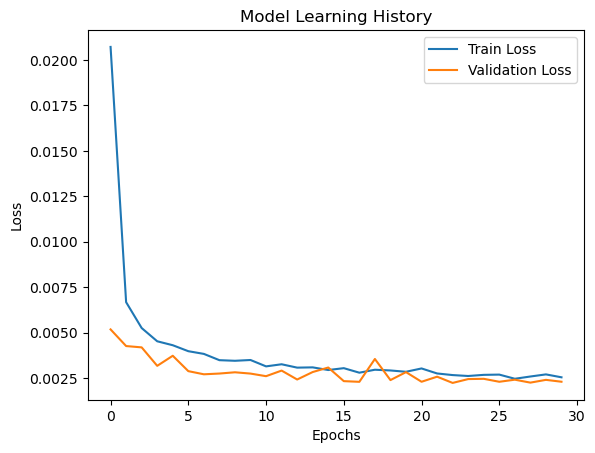

In [37]:
rnn_model_adv = build_rnn_model(input_shape)
train_and_plot_model(rnn_model_adv, X_train, y_train, epochs=30)

Epoch 1/30
99/99 [==============================] - 6s 19ms/step - loss: 0.0103 - val_loss: 0.0042
Epoch 2/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 3/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 4/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 5/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 6/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 7/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 8/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 9/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 10/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 11/

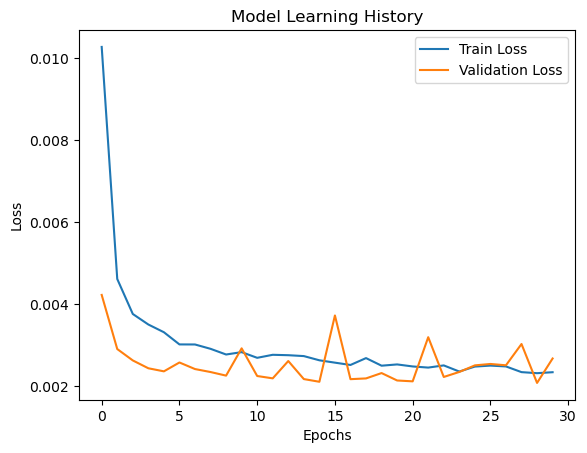

In [38]:
gru_model_adv = build_gru_model(input_shape)
train_and_plot_model(gru_model_adv, X_train, y_train, epochs=30)

Epoch 1/30
99/99 [==============================] - 6s 19ms/step - loss: 0.0115 - val_loss: 0.0053
Epoch 2/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 3/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 4/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 5/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 6/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 7/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 8/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 9/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 10/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 11/

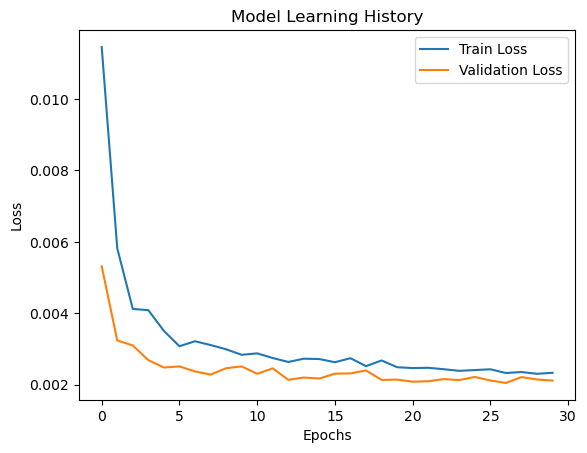

In [39]:
lstm_model_adv = build_lstm_model(input_shape)
train_and_plot_model(lstm_model_adv, X_train, y_train, epochs=30)

In [40]:
y_test_pred_rnn_adv = rnn_model_adv.predict(X_test)
y_test_pred_gru_adv = gru_model_adv.predict(X_test)
y_test_pred_lstm_adv = lstm_model_adv.predict(X_test)


41/41 [==============================] - 1s 4ms/step


In [41]:
print(y_test.shape)
y_test_true = pm10_scaler.inverse_transform(y_test.reshape(-1, 1))

print(y_test_true.shape)


y_test_pred_rnn_adv = pm10_scaler.inverse_transform(y_test_pred_rnn_adv)
y_test_pred_gru_adv = pm10_scaler.inverse_transform(y_test_pred_gru_adv)
y_test_pred_lstm_adv = pm10_scaler.inverse_transform(y_test_pred_lstm_adv)

(1302,)
(1302, 1)


In [42]:
def calculate_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    return mae, mse, evs

In [44]:
rnn_mae_adv, rnn_mse_adv, rnn_evs_adv = calculate_metrics(y_test_true, y_test_pred_rnn_adv)
gru_mae_adv, gru_mse_adv, gru_evs_adv = calculate_metrics(y_test_true, y_test_pred_gru_adv)
lstm_mae_adv, lstm_mse_adv, lstm_evs_adv = calculate_metrics(y_test_true, y_test_pred_lstm_adv)

print("RNN Model Metrics:")
print(f"MAE: {rnn_mae_adv}, MSE: {rnn_mse_adv}, EVS: {rnn_evs_adv}")

print("\nGRU Model Metrics:")
print(f"MAE: {gru_mae_adv}, MSE: {gru_mse_adv}, EVS: {gru_evs_adv}")

print("\nLSTM Model Metrics:")
print(f"MAE: {lstm_mae_adv}, MSE: {lstm_mse_adv}, EVS: {lstm_evs_adv}")

RNN Model Metrics:
MAE: 4.579497168837538, MSE: 44.28734744410333, EVS: 0.7084935823612974

GRU Model Metrics:
MAE: 4.459098564979583, MSE: 48.920618156128036, EVS: 0.7036441744700349

LSTM Model Metrics:
MAE: 4.16066383655657, MSE: 39.59283913614153, EVS: 0.7386388429287651


(1302,)


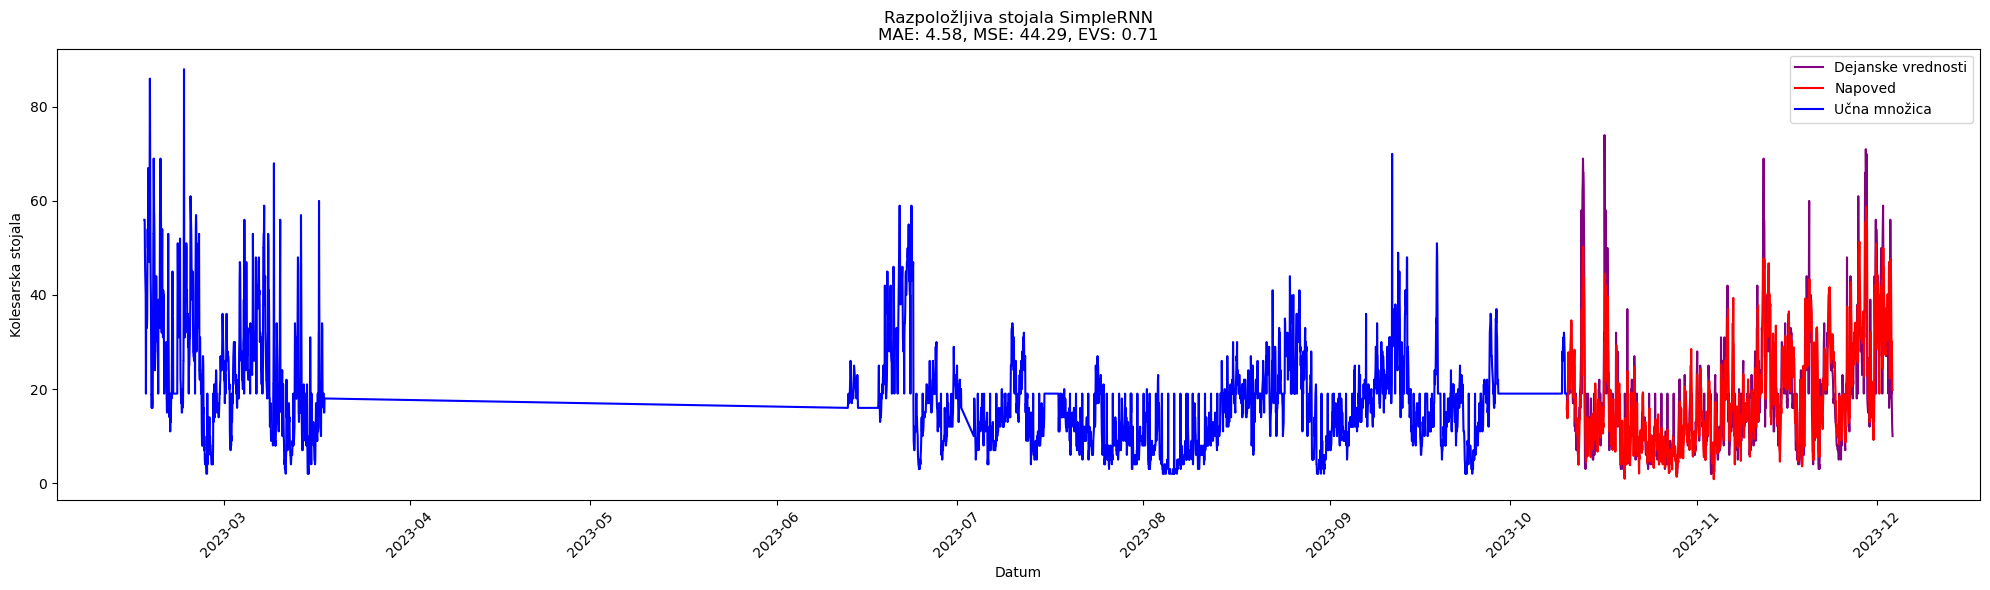

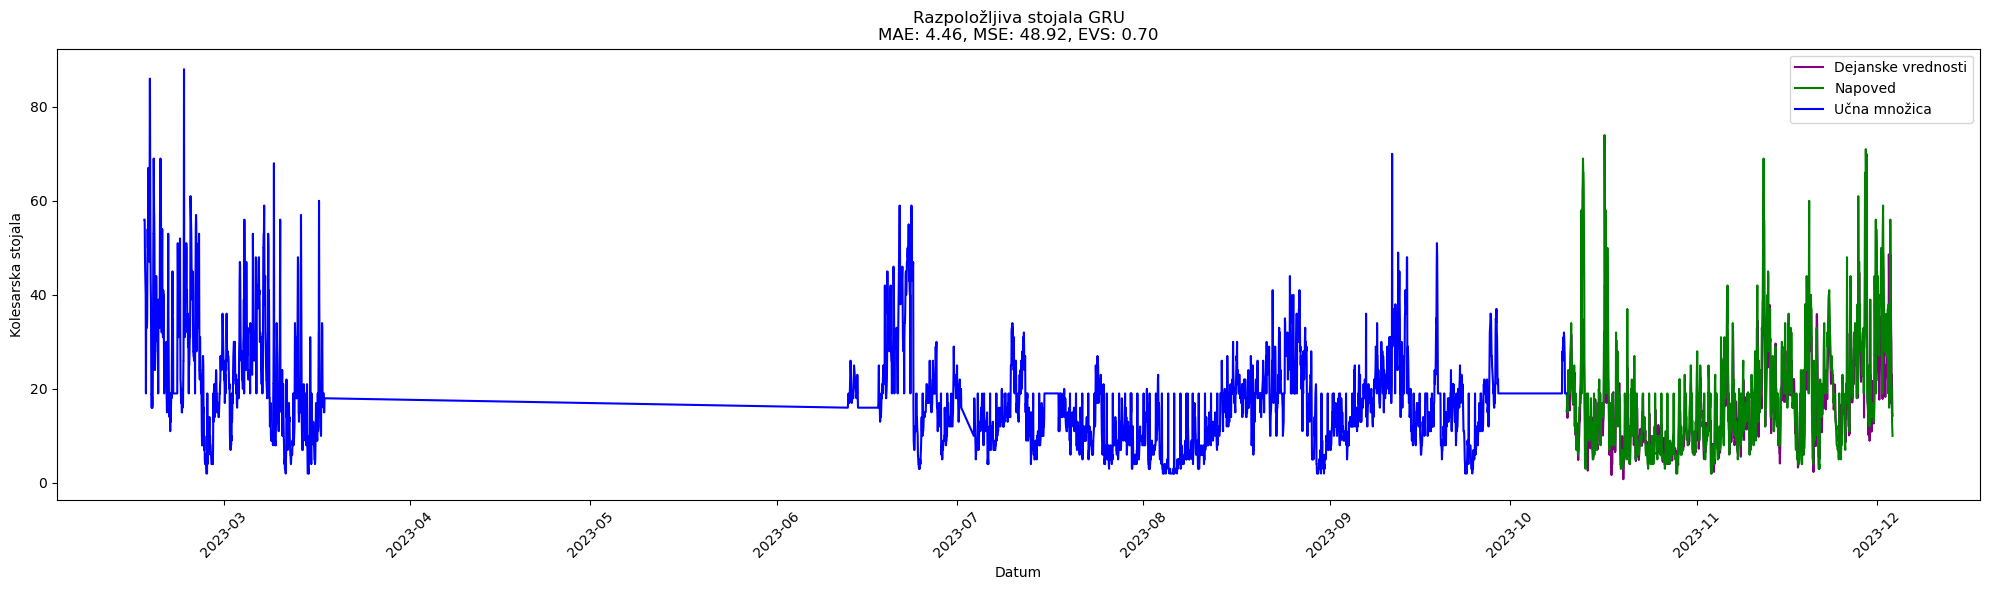

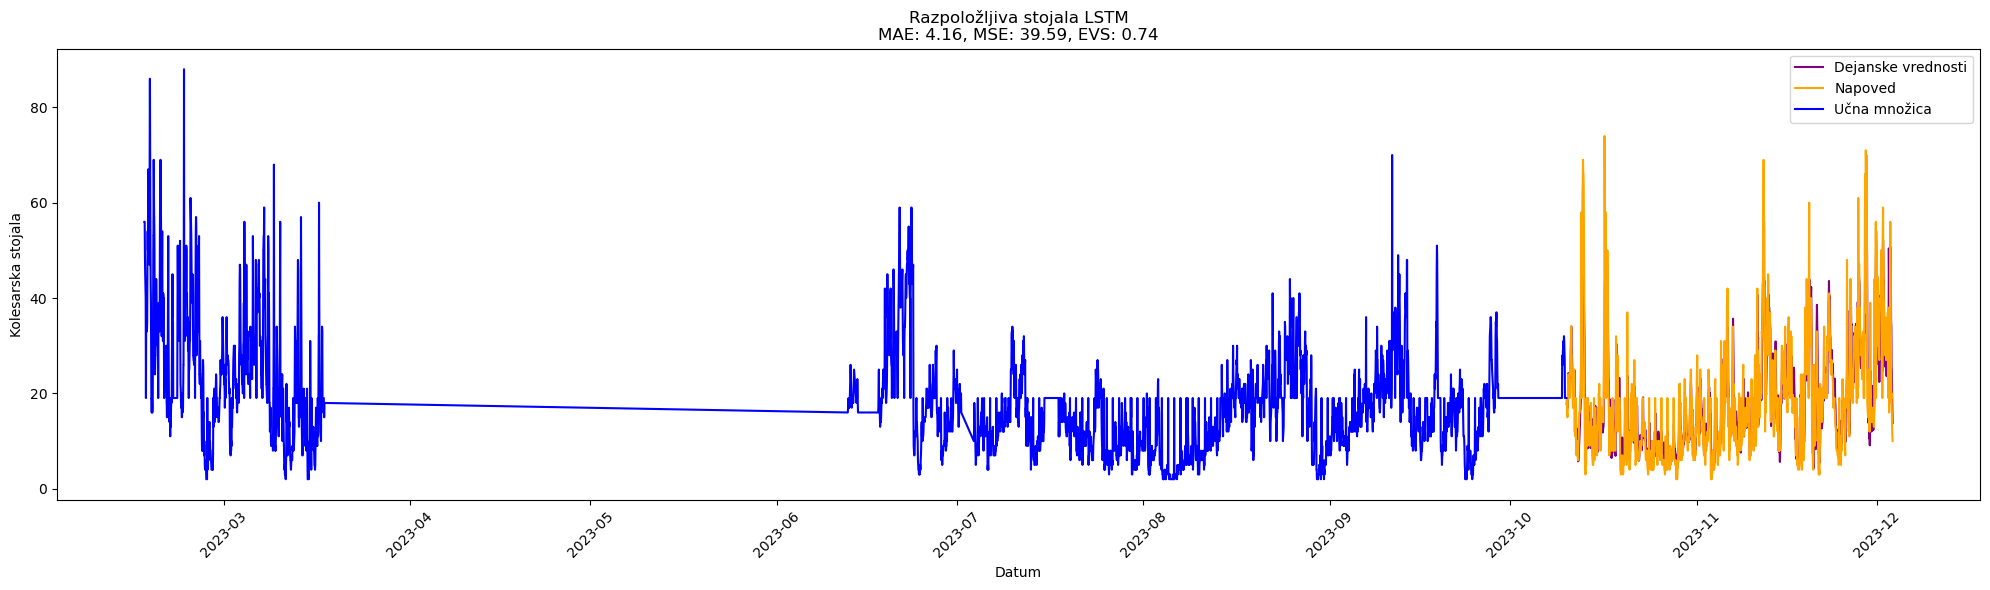

In [46]:
dates = all_data['Date'][:-look_back][-len(y_test):]
train_data =  all_data['Date'][:len(train_data)]


print(dates.shape)
# Function to plot a comparison between actual values and predictions for a given model
def plot_comparison(train_dates, train_data, test_dates, y_pred_inverse, y_test_inverse, model_name, color1, color2, mae, mse, evs):
    plt.figure(figsize=(20, 6))
    plt.title(f'Razpoložljiva stojala {model_name}\nMAE: {mae:.2f}, MSE: {mse:.2f}, EVS: {evs:.2f}')
    plt.xlabel('Datum')
    plt.ylabel('Kolesarska stojala')
    plt.xticks(rotation=45)
    plt.plot(test_dates, y_test_inverse, color='purple', label='Dejanske vrednosti')
    plt.plot(test_dates, y_pred_inverse, color=color2, label=f'Napoved')
    plt.plot(train_dates, train_data, color=color1, label='Učna množica')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotting RNN predictions
plot_comparison(
    train_dates,
    train_data[:,6],
    dates,
    y_test_pred_rnn_adv,
    y_test_true,

    'SimpleRNN',
    'blue',
    'red',
    rnn_mae_adv,
    rnn_mse_adv,
    rnn_evs_adv
)

# Plotting GRU predictions
plot_comparison(
    train_dates,
    train_data[:,6],
    dates,
    y_test_true,
    y_test_pred_gru_adv,
    'GRU',
    'blue',
    'green',
    gru_mae_adv,
    gru_mse_adv,
    gru_evs_adv
)

# Plotting LSTM predictions
plot_comparison(
    train_dates,
    train_data[:,6],
    dates,
    y_test_true,
    y_test_pred_lstm_adv,
    'LSTM',
    'blue',
    'orange',
    lstm_mae_adv,
    lstm_mse_adv,
    lstm_evs_adv
)